<a href="https://colab.research.google.com/github/Professor-Shin/CS-Class-Project/blob/main/Image_Processing/ImPro_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2**
By: Siwakorn Saiphaisri 6634468023

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

Saving Filament_68b453706bc4c.jpg to Filament_68b453706bc4c (2).jpg
User uploaded file "Filament_68b453706bc4c (2).jpg" with length 40176 bytes


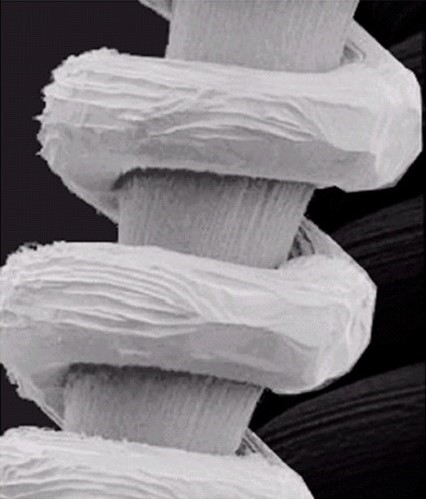

In [ ]:
# Load the image
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

img = cv2.imread(fn)
cv2_imshow(img)

## **Challenge**
Write a program to enhance an image so that the dark part on the right side of an image brings out
more details using:


### Method 1: global histogram equalization


In [ ]:
def global_HE(img) :
  # Convert the image to grayscale
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply global histogram equalization
  equalized_img = cv2.equalizeHist(gray_img)

  # Display the original and equalized images
  print("Original Image:")
  cv2_imshow(img)
  print("Equalized Image:")
  cv2_imshow(equalized_img)

Original Image:


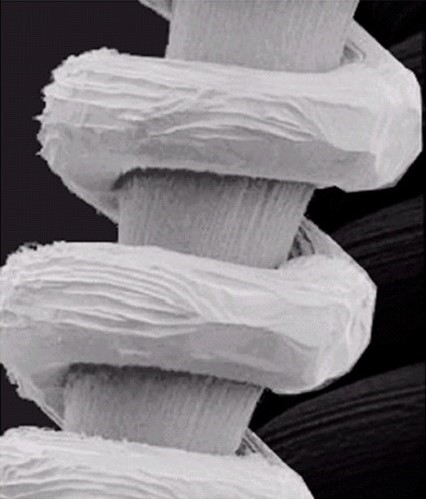

Equalized Image:


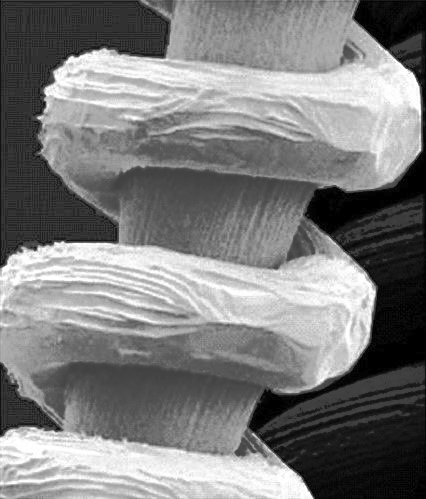

In [ ]:
global_HE(img)

### Method 2: Local histogram equalization
with 3 neighborhood sizes: 3x3, 7x7, and 11x11. Find the
values for 𝑘0
, 𝑘1
, and 𝑘2
that you think are the most suitable values

In [ ]:
def enhance(partial_img, global_mean, global_deviation, e, k0, k1, k2):
    local_mean = np.mean(partial_img)
    local_variance = np.var(partial_img)
    if local_mean < k0 * global_mean and k1 * global_deviation < local_variance < k2 * global_deviation:
        return e * partial_img
    else:
        return partial_img


In [ ]:
def local_HE(img, global_mean, global_deviation, e, k0, k1, k2, tileGridSize=(8, 8)):
    # Convert image to grayscale
    if len(img.shape) == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray_img = img

    h, w = gray_img.shape
    enhanced_img = np.copy(gray_img)
    tile_h, tile_w = tileGridSize

    for y in range(0, h, tile_h):
        for x in range(0, w, tile_w):
            # Define the boundaries of the current tile
            y_end = min(y + tile_h, h)
            x_end = min(x + tile_w, w)
            tile = gray_img[y:y_end, x:x_end]

            # Ensure the tile is not empty
            if tile.size > 0:
                enhanced_tile = enhance(tile, global_mean, global_deviation, e, k0, k1, k2)
                enhanced_img[y:y_end, x:x_end] = enhanced_tile

    return enhanced_img


customize cell

Global Mean: 126.66887452526336
Global Deviation: 73.12987117937584
Local Histogram Equalization (3x3 neighborhood):


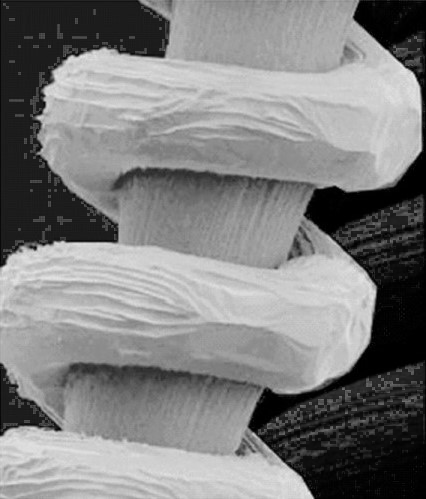

Local Histogram Equalization (7x7 neighborhood):


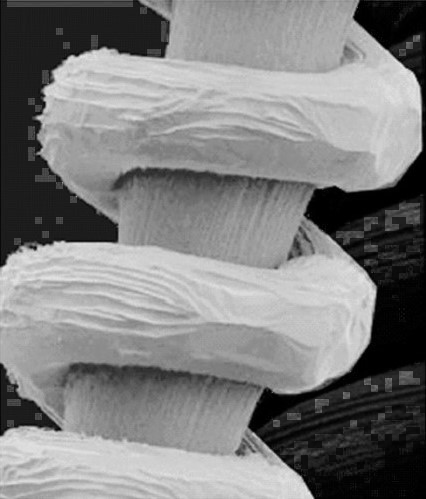

Local Histogram Equalization (11x11 neighborhood):


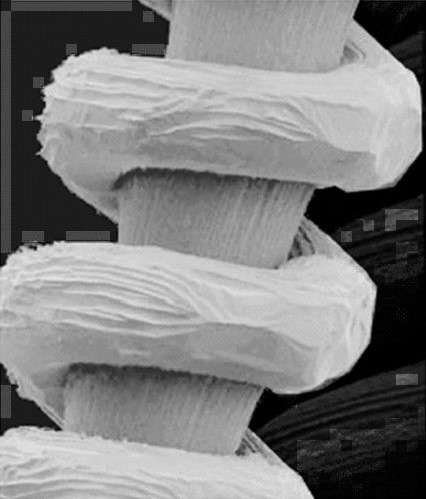

In [ ]:
global_mean = np.mean(img)
print(f"Global Mean: {global_mean}")
global_deviation = np.std(img)
print(f"Global Deviation: {global_deviation}")

e = 2.5 # Example enhancement factor, you can adjust this

# Experiment with different k values to find the most suitable values
k0 = 0.3 # Example k0 value
k1 = 0.07 # Example k1 value
k2 = 0.5 # Example k2 value

print("Local Histogram Equalization (3x3 neighborhood):")
k0_img = local_HE(img, global_mean, global_deviation, e, k0, k1, k2, tileGridSize=(3, 3))
cv2_imshow(k0_img)

print("Local Histogram Equalization (7x7 neighborhood):")
k1_img = local_HE(img, global_mean, global_deviation, e, k0, k1, k2, tileGridSize=(7, 7))
cv2_imshow(k1_img)

print("Local Histogram Equalization (11x11 neighborhood):")
k2_img = local_HE(img, global_mean, global_deviation, e, k0, k1, k2, tileGridSize=(11, 11))
cv2_imshow(k2_img)

### Method 3: Local gamma correction
with 3 neighborhood sizes: 5x5, 9x9, and 15x15. Find the most
suitable value for gamma.

In [ ]:
def gamma_correction(r, c, gamma):
    transformed_value = c * (r / 255.0)**gamma * 255.0
    return int(np.clip(transformed_value, 0, 255))

In [ ]:
def local_GC(img, global_mean, global_deviation, k0, k1, k2, c=1.5, gamma_value=1.0, tileGridSize=(8, 8)):
    # Convert image to grayscale if it's not already
    if len(img.shape) == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray_img = img

    h, w = gray_img.shape
    enhanced_img = np.copy(gray_img)
    tile_h, tile_w = tileGridSize

    for y in range(0, h, tile_h):
        for x in range(0, w, tile_w):
            # Define the boundaries of the current tile
            y_end = min(y + tile_h, h)
            x_end = min(x + tile_w, w)
            tile = gray_img[y:y_end, x:x_end]

            # Fine local stat value
            local_mean = np.mean(tile)
            local_variance = np.var(tile)

            # Ensure the tile is not empty
            if tile.size > 0 and local_mean < k0 * global_mean and k1 * global_deviation < local_variance < k2 * global_deviation :
                # Apply gamma correction to each pixel in the tile
                enhanced_tile = np.zeros_like(tile, dtype=np.uint8)
                for i in range(tile.shape[0]):
                    for j in range(tile.shape[1]):
                        enhanced_tile[i, j] = gamma_correction(tile[i, j],c, gamma_value) # Assuming c=1 for now

                enhanced_img[y:y_end, x:x_end] = enhanced_tile

    return enhanced_img

Global Mean: 126.66887452526336
Global Deviation: 73.12987117937584
Local Gamma Correction (5x5 neighborhood):


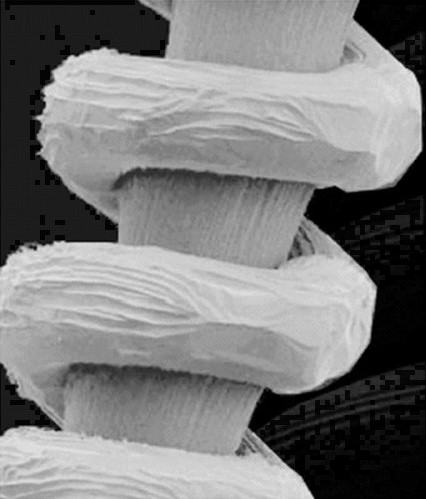

Local Gamma Correction (9x9 neighborhood):


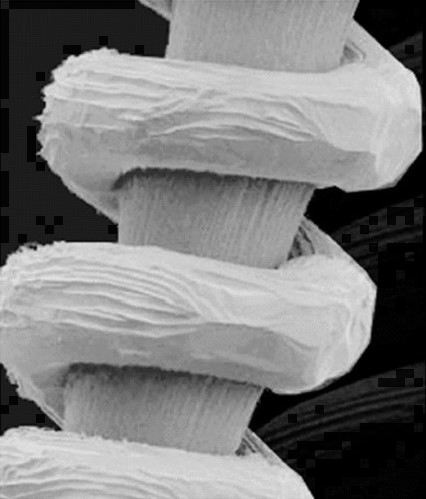

Local Gamma Correction (15x15 neighborhood):


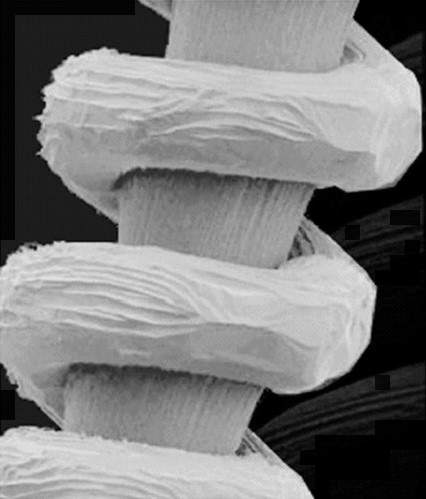

In [ ]:
global_mean = np.mean(img)
print(f"Global Mean: {global_mean}")
global_deviation = np.std(img)
print(f"Global Deviation: {global_deviation}")

# Experiment with different k values to find the most suitable values
k0 = 0.3 # Example k0 value
k1 = 0.07 # Example k1 value
k2 = 0.5 # Example k2 value

print("Local Gamma Correction (5x5 neighborhood):")
k0_img = local_GC(img, global_mean, global_deviation, k0, k1, k2, c=1.5, gamma_value=2.0,tileGridSize=(5, 5))
cv2_imshow(k0_img)

print("Local Gamma Correction (9x9 neighborhood):")
k1_img = local_GC(img, global_mean, global_deviation, k0, k1, k2, c=1.5, gamma_value=2.0, tileGridSize=(9, 9))
cv2_imshow(k1_img)

print("Local Gamma Correction (15x15 neighborhood):")
k2_img = local_GC(img, global_mean, global_deviation, k0, k1, k2, c=1.5, gamma_value=2.0, tileGridSize=(15, 15))
cv2_imshow(k2_img)